Plotting the results of training many low-rank networks for Fig 1 and some SI.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rcParams['axes.titlesize'] = 24
plt.rcParams['axes.labelsize'] = 19
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['axes.titlepad'] = 20
plt.rcParams['axes.labelpad'] = 10
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False

palette = sns.color_palette()
palette = [palette[2], palette[1], palette[0], palette[3], palette[4]]

In [4]:
rdm_results = dict()
with np.load('../data/rdm_results.npz') as d:
    rdm_results['p'] = d['arr_0']
    rdm_results['c'] = d['arr_1']
    rdm_results['preg'] = d['arr_2']
    rdm_results['creg'] = d['arr_3']
    rdm_results['acc'] = d['arr_4']
    rdm_results['loss'] = d['arr_5']
    rdm_results['acc_res'] = d['arr_6']
    rdm_results['loss_res'] = d['arr_7']
    
romo_results = dict()
with np.load('../data/romo_results.npz') as d:
    romo_results['p'] = d['arr_0']
    romo_results['c'] = d['arr_1']
    romo_results['preg'] = d['arr_2']
    romo_results['creg'] = d['arr_3']
    romo_results['acc'] = d['arr_4']
    romo_results['loss'] = d['arr_5']
    romo_results['acc_res'] = d['arr_6']
    romo_results['loss_res'] = d['arr_7']
    
raposo_results = dict()
with np.load('../data/raposo_results.npz') as d:
    raposo_results['p'] = d['arr_0']
    raposo_results['c'] = d['arr_1']
    raposo_results['preg'] = d['arr_2']
    raposo_results['creg'] = d['arr_3']
    raposo_results['r2'] = d['arr_4']
    raposo_results['acc'] = d['arr_5']
    raposo_results['loss'] = d['arr_6']
    raposo_results['acc_res'] = d['arr_7']
    raposo_results['loss_res'] = d['arr_8']
    
mante_results = dict()
with np.load('../data/mante_results.npz') as d:
    mante_results['p'] = d['arr_0']
    mante_results['c'] = d['arr_1']
    mante_results['preg'] = d['arr_2']
    mante_results['creg'] = d['arr_3']
    mante_results['r2'] = d['arr_4']
    mante_results['acc'] = d['arr_5']
    mante_results['loss'] = d['arr_6']
    mante_results['acc_res'] = d['arr_7']
    mante_results['loss_res'] = d['arr_8']
    
dms_results = dict()
with np.load('../data/dms_results.npz') as d:
    dms_results['p'] = d['arr_0']
    dms_results['c'] = d['arr_1']
    dms_results['preg'] = d['arr_2']
    dms_results['creg'] = d['arr_3']
    dms_results['acc'] = d['arr_4']
    dms_results['loss'] = d['arr_5']
    dms_results['acc_res'] = d['arr_6']
    dms_results['loss_res'] = d['arr_7']
    
results_list = [rdm_results, romo_results, raposo_results, mante_results, dms_results]
labels = ['DM', 'WM', 'MDM', 'CDM', 'DMS']

In [5]:
rdm_dist = np.load('../data/rdm_lr_c_boot_distr.npy')
romo_dist = np.load('../data/romo_lr_c_boot_distr.npy')
raposo_dist = np.load('../data/raposo_lr_c_boot_distr.npy')
mante_dist = np.load('../data/mante_lr_c_boot_distr.npy')
dms_dist = np.load('../data/dms_lr_c_boot_distr.npy')

In [6]:
for i, label in enumerate(labels):
    print(f'{label}: {len([p for p in results_list[i]["p"] if p < 0.05 / 100])}')

DM: 5
WM: 5
MDM: 9
CDM: 100
DMS: 100


In [7]:
for i, label in enumerate(labels):
    print(f'{label}: {len([p for p in results_list[i]["preg"] if p < 0.05 / 100])}')

DM: 0
WM: 0
MDM: 1
CDM: 100
DMS: 48


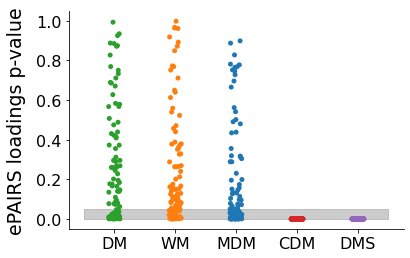

In [8]:
sns.stripplot(data=[l['p'] for l in results_list], palette=palette)
plt.xticks(list(range(len(labels))), labels)
plt.ylabel('ePAIRS loadings p-value')
xlims = plt.gca().get_xlim()
plt.fill_between([xlims[0], xlims[1]], [0, 0], [0.05, 0.05], color='gray', alpha=.4)
# plt.savefig('si_sec1/load_pval.svg', bbox_inches='tight')

<ErrorbarContainer object of 3 artists>

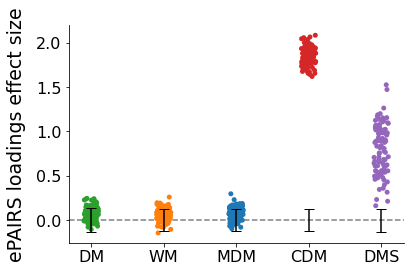

In [9]:
sns.stripplot(data=[l['c'] for l in results_list], palette=palette)
plt.xticks(list(range(len(labels))), labels)
plt.ylabel('ePAIRS loadings effect size')
plt.axhline(0, ls='--', c='gray')
plt.errorbar(0, 0, yerr=2*np.std(rdm_dist), ecolor='k', elinewidth=1.5, capsize=5, zorder=30)
plt.errorbar(1, 0, yerr=2*np.std(romo_dist), ecolor='k', elinewidth=1.5, capsize=5, zorder=30)
plt.errorbar(2, 0, yerr=2*np.std(raposo_dist), ecolor='k', elinewidth=1.5, capsize=5, zorder=30)
plt.errorbar(3, 0, yerr=2*np.std(mante_dist), ecolor='k', elinewidth=1.5, capsize=5, zorder=30)
plt.errorbar(4, 0, yerr=2*np.std(dms_dist), ecolor='k', elinewidth=1.5, capsize=5, zorder=30)
# plt.savefig('figure_1/load_cval.svg', bbox_inches='tight')

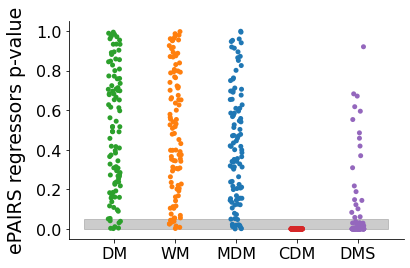

In [10]:
sns.stripplot(data=np.stack([l['preg'] for l in results_list], axis=1), palette=palette)
plt.xticks(list(range(len(labels))), labels)
plt.ylabel('ePAIRS regressors p-value')
xlims = plt.gca().get_xlim()
plt.fill_between([xlims[0], xlims[1]], [0, 0], [0.05, 0.05], color='gray', alpha=.4)
# plt.savefig('si_sec1/reg_pval.svg', bbox_inches='tight')

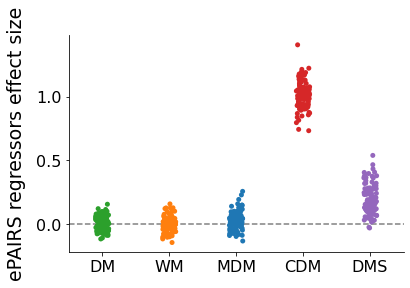

In [11]:
sns.stripplot(data=np.stack([l['creg'] for l in results_list], axis=1), palette=palette)
plt.xticks(list(range(len(labels))), labels)
plt.ylabel('ePAIRS regressors effect size')
plt.axhline(0, ls='--', c='gray')
# plt.savefig('si_sec1/reg_cval.svg', bbox_inches='tight')

Text(0, 0.5, 'Resampled nets accuracy')

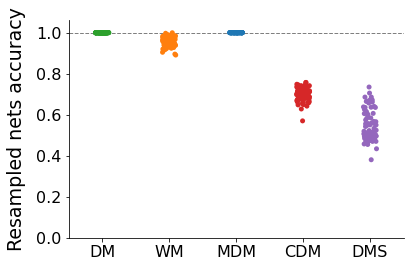

In [12]:
sns.stripplot(data=np.stack([l['acc_res'].mean(axis=1) for l in results_list], axis=1), palette=palette)
plt.axhline(1, c='gray', lw=1, ls='--')
plt.xticks(list(range(len(labels))), labels)
plt.ylim(0, 1.06)
plt.ylabel('Resampled nets accuracy')
# plt.savefig('figure_1/res.svg', bbox_inches='tight')

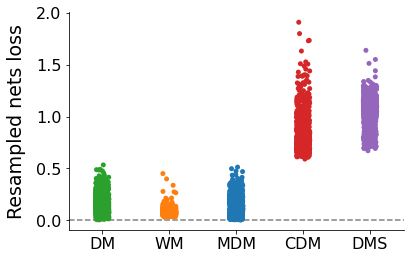

In [13]:
sns.stripplot(data=[l['loss_res'].ravel() for l in results_list], palette=palette)
plt.xticks(list(range(len(labels))), labels)
plt.ylabel('Resampled nets loss')
plt.axhline(0, ls='--', c='gray')
# plt.savefig('figure_1/res_loss.svg', bbox_inches='tight')